# Bitcoin Data - CoinDesk API

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
page = requests.get('https://api.coindesk.com/v1/bpi/historical/close.json?start=2013-07-01&end=2020-08-13')

print('Type:\n{}\n'.format(type(page)))
print('Text:\n{}\n'.format(page.text[:50]))
print('URL:\n{}\n'.format(page.url))

Type:
<class 'requests.models.Response'>

Text:
{"bpi":{"2013-07-01":84.6069,"2013-07-02":87.6562,

URL:
https://api.coindesk.com/v1/bpi/historical/close.json?start=2013-07-01&end=2020-08-13



In [3]:
# Turn page.text into a dictionary
x = page.json()

print('Type:\n{}\n'.format(type(x)))
print('Dictionary keys:\n{}\n'.format(x.keys()))

# To take a look at the whole dictionary, uncomment the next line
#print('The whole dictionary:\n{}\n'.format(json.dumps(x, indent=2)))

Type:
<class 'dict'>

Dictionary keys:
dict_keys(['bpi', 'disclaimer', 'time'])



In [4]:
dates = [k for k,v in x['bpi'].items()]
prices = [v for k,v in x['bpi'].items()]

df = pd.DataFrame({'dates': dates,
                  'prices': prices})
df['dates'] = pd.to_datetime(df['dates'])

df.head()

,dates,prices
0,2013-07-01,84.6069
1,2013-07-02,87.6562
2,2013-07-03,76.8901
3,2013-07-04,77.6850
4,2013-07-05,66.3400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dates   2601 non-null   datetime64[ns]
 1   prices  2601 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.8 KB


## Returns
Returns are computed as:
\begin{equation}
r_{t} = \log\left(\frac{P_{t}}{P_{t-1}}\right)
\end{equation}

In [6]:
returns = [np.nan]

for i in range(1, len(prices)):
    returns.append(np.log(prices[i]/prices[i-1]))

df['returns'] = returns
df.head()

,dates,prices,returns
0,2013-07-01,84.6069,NaN
1,2013-07-02,87.6562,0.035407
2,2013-07-03,76.8901,-0.131045
3,2013-07-04,77.6850,0.010285
4,2013-07-05,66.3400,-0.157869


In [7]:
print('Data Frame shape: {}'.format(df.shape))

Data Frame shape: (2601, 3)


## Descriptive statistics for daily returns of Bitcoin

In [8]:
df[['returns']].describe()

,returns
count,2600.000000
mean,0.001891
std,0.043111
min,-0.481214
25%,-0.012559
50%,0.001670
75%,0.018473
max,0.347752


# Plots - Daily Prices and Returns

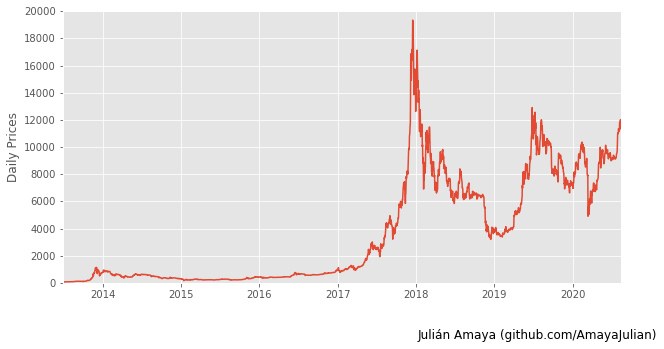

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(df['dates'], df['prices'])
plt.xticks(pd.to_datetime(['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
           '2018-01-01', '2019-01-01', '2020-01-01']),
          ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.yticks(np.arange(0, 22000, 2000), np.arange(0, 22000, 2000, dtype='int'))
plt.xlim(pd.to_datetime('2013-07-01'), pd.to_datetime('2020-08-13'))
plt.ylim(0, 20000)
plt.ylabel('Daily Prices', size=12)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

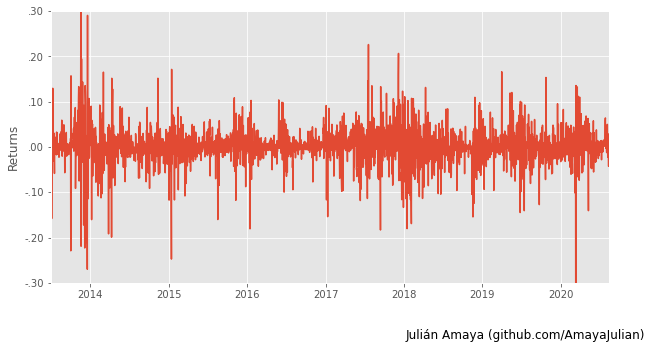

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df['dates'], df['returns'])
plt.xticks(pd.to_datetime(['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
           '2018-01-01', '2019-01-01', '2020-01-01']),
          ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.yticks(np.arange(-0.3, 0.4, 0.1), ['-.30', '-.20', '-.10', '.00', '.10', '.20', '.30'])
plt.xlim(pd.to_datetime('2013-07-01'), pd.to_datetime('2020-08-13'))
plt.ylim(-0.3, 0.3)
plt.ylabel('Returns', size=12)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()